In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [42]:
class problem:
    def __init__(self, size = 20, grid_limit = 100):
        self.cities = []
        self.size = size
        
        for i in range(size):
            city = (np.random.randint(grid_limit), np.random.randint(grid_limit))
            
            while city in self.cities:
                city = (np.random.randint(grid_limit), np.random.randint(grid_limit))
            
            self.cities.append(city)

In [56]:
class solution:
    def __init__(self, probl, path = None):
        self.probl = probl
        
        if path is None:
            self.path = np.arange(len(self.probl.cities))
            np.random.shuffle(self.path)
        else:
            self.path = path
        
        dists = np.zeros(len(self.path) - 1)
        
        for i in range(len(dists)):
            dists[i] = np.sqrt((self.probl.cities[self.path[i]][0] - self.probl.cities[self.path[i + 1]][0]) ** 2 + 
                               (self.probl.cities[self.path[i]][1] - self.probl.cities[self.path[i + 1]][1]) ** 2)
            
        self.fitness = np.sum(dists)
        
    def plot(self):
        x = [city[0] for city in self.probl.cities]
        y = [city[1] for city in self.probl.cities]
        path_x = [x[city] for city in self.path]
        path_y = [y[city] for city in self.path]
        plt.scatter(x, y)
        plt.plot(path_x, path_y)
        plt.title('Fitness Score: ' + str(self.fitness))
        plt.show()

In [84]:
class population:
    def __init__(self, probl, population_size = 50):
        self.probl = probl
        self.solutions = []
        self.population_size = population_size
         
        for i in range(population_size):
            self.solutions.append(solution(self.probl))
            
    def crossover(self):
        parents = []
        
        for i in range(2):
            pick = np.random.choice(self.population_size, 5, replace = False)
            tournament = []
            for j in range(len(pick)):
                tournament.append(self.solutions[pick[j]])
                
            fittest = tournament[0]
            for j in range(1, len(tournament)):
                if tournament[j].fitness < fittest.fitness:
                    fittest = tournament[j]
                    
            parents.append(fittest)
            
        co_path = np.zeros(self.probl.size, dtype = int) - 1
        start = np.random.randint(self.probl.size - 1)
        end = np.random.randint(self.probl.size)
        while start >= end:
            end = np.random.randint(self.probl.size)
            
        co_path[start : end] = parents[0].path[start : end]
        for i in range(len(co_path)):
            for j in range(len(co_path)):
                if parents[1].path[j] not in co_path:
                    co_path[i] = parents[1].path[j]
        
        return solution(self.probl, path = co_path)
    
    def crossover_all(self):
        self.new_solutions = []
        while len(self.new_solutions) < self.population_size:
            self.new_solutions.append(self.crossover())
        
        self.solutions = self.new_solutions
    
    def mutation(self):
        for i in range(len(self.solutions)):
            for j in range(len(self.solutions[i].path)):
                if np.random.rand() < 0.01:
                    swap = np.random.randint(len(self.solutions[i].path))
                    temp = self.solutions[i].path[swap]
                    self.solutions[i].path[swap] = self.solutions[i].path[j]
                    self.solutions[i].path[j] = temp
                    
    def get_fittest(self):
        fittest = self.solutions[0]
        for i in range(1, len(self.solutions)):
            if self.solutions[i].fitness < fittest.fitness:
                fittest = self.solutions[i]
                
        return fittest

In [85]:
class GA:
    def __init__(self):
        self.probl = problem()
        self.pop = population(self.probl)
        
    
    def evolve(self):
        self.pop.crossover_all()
        self.pop.mutation()       

Evolution in progress...
Evolution done! Final score is: 372.0. That is 52.0 % better than the best generation 1 solution.


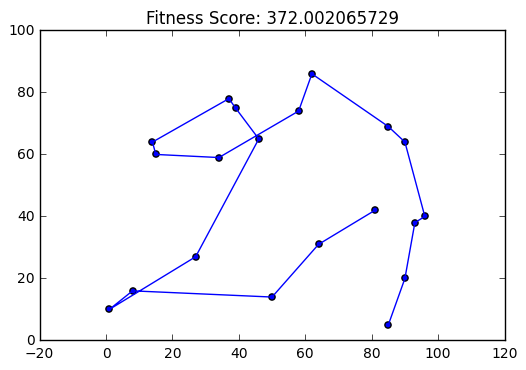

In [91]:
GArun = GA()
print('Evolution in progress...')
start = GArun.pop.get_fittest().fitness
for i in range(100):
    GArun.evolve()

end = GArun.pop.get_fittest().fitness  
print('Evolution done! Final score is: ' + str(round(end)) + '. That is ' + str(round((1 - end / start) * 100)) 
       + ' % better than the best generation 1 solution.')

GArun.pop.get_fittest().plot()
plt.show()